<a href="https://colab.research.google.com/github/jjresusta/ASSIGNMENT-1-CDA/blob/main/Copia_de_Session_2_Logistic_Regression_EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_2/Session_2_Logistic_Regression_EXERCISE.ipynb)

**Resources:**
* Sklearn documentation

# Logistic Regression Assignment

We are given a dataset of  direct marketing campaigns of a credit institution. **Our goal is to implement a model to predict whether the client will subscribe to a term deposit.**

**When working on the assignment there could be multiple ways to explore data or implement specific analysis. Choose that one you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**


### Enjoy!

DATASET DESCRIPTION

- age (numeric)
- job : type of job 
- marital : marital status
- education 
- default: has credit in default? 
- housing: has housing loan? 
- loan: has personal loan? 
- contact: contact communication type 
- month: last contact month of year 
- day_of_week: last contact day of the week 
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client 
- pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign 
- emp.var.rate: employment variation rate 
- cons.price.idx: consumer price index 
- cons.conf.idx: consumer confidence index 
- euribor3m: euribor 3 month rate 
- nr.employed: number of employees 
- y — Target variable: has the client subscribed a term deposit? 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('banking.csv')
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1


In [3]:
data.shape

(41188, 21)

## EDA and Feature Engineering 

An important requirement for Logistic Regression to function properly is Feature Engineering as it helps to identify independent variables. Without proper identification of independent variables Logistic Regression fails to perform correctly.

One disadvantage of logistic regression is that it doesn’t handle large number of categorical variables well.

```education``` column has many categories, try to reduce the categories for a better modelling. The education column has the following categories.


In [4]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We will group all ```basic.XX``` in a unique value ```basic```

In [5]:
df = data.replace(['basic.4y','basic.6y','basic.9y'],'basic')

In [6]:
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


##### Analyse the distribution of the target variable

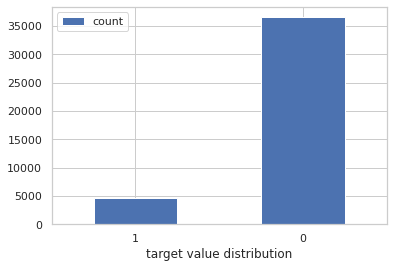

In [7]:
X = (df["y"] == 1).sum()
Y = (df["y"] == 0).sum()
target = pd.DataFrame({'target value distribution':['1','0'], 'count':[X,Y]})
ax = target.plot.bar(x= 'target value distribution',y = 'count',rot=0)





In [8]:
sum = X + Y
target = pd.DataFrame({'y':['1','0'], 'count':[X,Y], 'perc': [(X/sum)*100,(Y/sum)*100]})
target

,y,count,perc
0,1,4640,11.265417
1,0,36548,88.734583


##### What can we observe about the distribution of the target variable

There are far more people who wont get a deposit compared to those that will get one.

##### Observe how the different numeric variables behave for the 2 classes

In [9]:
df_1 = df[df['y']==1]
df_2 = df[df['y']==0]
frames = [df_1,df_2]
df_ = pd.concat(frames)
df_num = df_.select_dtypes(include=[np.float])
df_f = df.groupby(['y']).mean()
df_f

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [10]:
df_f = df.groupby(['y']).sum()
df_f

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,1458674,8071436,96234,35967394,4838,9095.9,3421030.113,-1483596.5,139302.379,1.891785e+08
1,189837,2566807,9520,3675045,2286,-5723.2,433164.351,-184624.6,9851.347,2.364134e+07


Observations:
- At frist glance it does seem that duration affects in a great manner the chance that someone will subscribe
- Number of previous contacts does seems to affect in a great deal the chance that someone will subscribe
- Employment variation rate as well seems to affect a lot the chance someone will subscribe


##### Analyse other variables - Make some plots and discuss them

- **Job title**

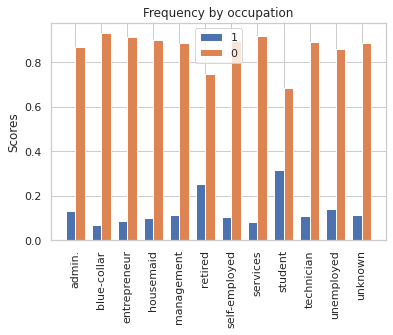

In [11]:
df_v = target = pd.DataFrame({'occupation':df['job'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Frequency by occupation')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()

As we can see across all groups people are significantly more inclined to not contract the deposit than to contract it. Students and the retired however seem to be more prown than the rest to contract the service. Particularly unlikely to contract the service are blue collar workers, services and entrepreneurs

- **Marital status**

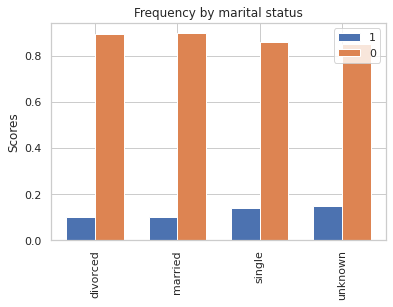

In [12]:
df_v = target = pd.DataFrame({'occupation':df['marital'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Frequency by marital status')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()

Here we can see that the groups that are the most prone to contract the deposit are those single or of unknown marital status.

- **Education**

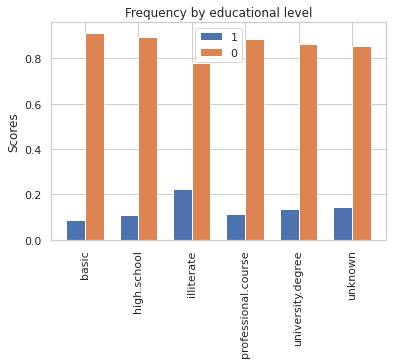

In [13]:
df_v = target = pd.DataFrame({'occupation':df['education'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Frequency by educational level')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()

As we can see those most categories are more or less equally as likely to contract the service except the illiterate which are almost twice as likely to contract the service than the rest.

- **Day of Week**

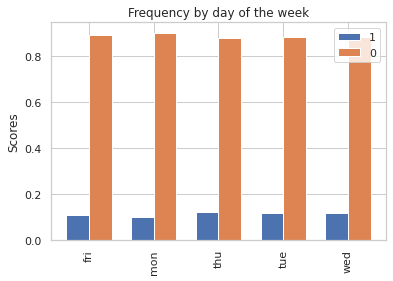

In [14]:
df_v = target = pd.DataFrame({'occupation':df['day_of_week'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Frequency by day of the week')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()


As we can see the chance of someone hiring the service is pretty equal. 

- **Month**

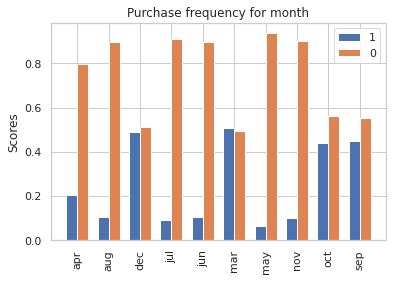

In [15]:
df_v = target = pd.DataFrame({'occupation':df['month'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Purchase frequency for month')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()


Completely different to the days of the week we can see that the month does affect to a big extent the chance that someone will hire the service. We can see that the summer months are particularly bad for the service while the winter months are really good with roughly an equal chance of people hiring the service than not hiring it.

- **poutcome**

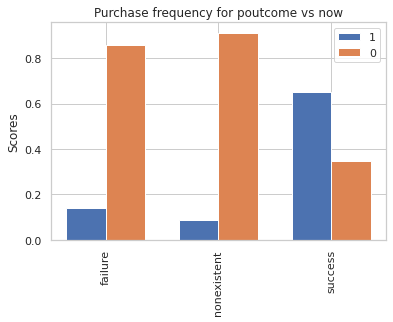

In [16]:
df_v = target = pd.DataFrame({'occupation':df['poutcome'], '1':(df["y"] == 1),'0':(df["y"] == 0)})
df_v = df_v.groupby(by="occupation").sum()
df_v = df_v.reset_index()
df_v['0f'] = (df_v.iloc[:,2]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
df_v['1f'] = (df_v.iloc[:,1]/(df_v.iloc[:,2]+df_v.iloc[:,1]))
labels = df_v.iloc[:,0]
positive = df_v.iloc[:,4]
negative = df_v.iloc[:,3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive, width, label='1')
rects2 = ax.bar(x + width/2, negative, width, label='0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Purchase frequency for poutcome vs now')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)
ax.legend()


As we can see in the graph success in previous campaigns was a high indicator of current success.

### Create dummy variables

In [17]:
df2 = pd.get_dummies(df)
df2

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


### Implement the Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


##### Prepare the dataset for training

In [50]:

X = df2.loc[:, df2.columns != 'y']
y = df2.loc[:, df2.columns == 'y']
# Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

model = LogisticRegression()
pred = model.fit(X_train,y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##### Compute predictions and accuracy using the accuracy score provided by the sklearn library

In [53]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set:', accuracy_score(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.913004774621672


####The problem of using accuracy score in a classifier occurs when we have an unbalanced dataset like the one we have were 0 score equals to 90% of the target variable. There is a risk that our model may be achieving a high accuracy just by being good at  predicting class 0.
#### Therefore we will look at other metrics such as the confusion matrix and the AUC.

In [54]:
from sklearn.metrics import roc_auc_score
#AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example. 
roc_auc_score(y_test, pred.predict_proba(X_test)[:, 1])
#We achieve a good AUC score (Close to 1) meaning that the true positive rate is higher than the false positive rate.

0.927400102290849

In [56]:
#Now we will plot the confusion matrix to explore deeper into this relationship
cm=metrics.confusion_matrix(y_test,y_pred)
#We get decent results for our model when classifyin class 0 however for class 1 we get really bad results with a terrible recall(more false negatives than true positives.)
#This is the consequence of having an unbalanced target variable with a disproportionate amount of 0s.
cm

array([[10706,   275],
       [  800,   576]])

##### Compute other metrics using classification report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))
 #As we can see from more detailed metrics our model was really good at classifying class 0 however really poor at classifying class 1.

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10981
           1       0.68      0.42      0.52      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



#### Remember:
    
**Precision:** percentage of your results which are relevant. Among all the elements that your model classify as positive, how many are really positive examples?

$\frac{TP}{TP+FP}$
                                            

**Recall:** percentage of total relevant results correctly classified by your algorithm.

$\frac{TP}{TP+FN}$                                            

In [28]:
565/(565+263) #Precision@1

0.6823671497584541

In [29]:
565/(811+565) #Recall@1

0.4106104651162791

##### SMOTE

During the exploratory data analysis we have seen that we have **Imbalanced Classes**, i.e.,the percentage of negative examples is much higher with respect to the percentage of positiv examples. Indeed, observing the confusion matrix we saw that the implmented model face some problem in predict the positive examples (if a client will subscribe a term deposit).


To face this problem we will apply an over-sampling technique trying to balance our dataset generating **Synthetic Samples:** it consists in creating new synthetic points from the minority class to increase its cardinality.

we will use the **SMOTE** Algorithm [see here for more details](https://arxiv.org/pdf/1106.1813.pdf).

In order to apply SMOTE **install the imblearn python library** (if you already have it you do not need to reinstall):

[Follow this instructions](https://imbalanced-learn.readthedocs.io/en/stable/install.html)


### Now implent again the model following all the steps

Prepare the data

In [73]:

X = df2.loc[:, df2.columns != 'y']
y = df2.loc[:, df2.columns == 'y']

##### Apply SMOTE to generate synthetic data

In [88]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

# Create training and test set - test size:30% random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

columns = X_train.columns

# Apply oversampling ONLY ON training data
os_data_X,os_data_y= os.fit_sample(X_train,y_train)

os_data_X =  pd.DataFrame(os_data_X, columns = columns)  
os_data_y = pd.DataFrame({'y':os_data_y})

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
#print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  51134
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


**Notice that we over-sampled only on the training data**

##### Check if the classes in the dataset now are balanced

In [89]:
os_data_y.value_counts()

y
1    25567
0    25567
dtype: int64

They are prefectly distributed!!

##### Implement the model

In [90]:
# Prepare thedata qith the oversampled dataset
X = os_data_X
y = os_data_y

# Create training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

model = LogisticRegression()
pred = model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Model Evaluation: evaluate the model and compare with previous implmentation/evaluation

In [95]:
#Compute predictions
y_pred = model.predict(X_test)

# score returns the mean accuracy on the given test data and labels.
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(pred.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


The total accuracy decreases. Is our model obtaining poorer results? Have a deeper look analysing confusion matrix and classification report

In [97]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm
#As we can see our model now predicts both our classes 1 and 0 in a much more balanced way.

array([[6531, 1135],
       [ 941, 6734]])

Analysing the confusion matriix we can observe that now our model is able to predict quite weel both positive and negative examples!! Let's see if this is also confirmed looking at precision and recall

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0,1]))
#We get lower scores for class 0 however we get an overall far better perfomance of our model specially on recall and precision

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7666
           1       0.86      0.88      0.87      7675

    accuracy                           0.86     15341
   macro avg       0.86      0.86      0.86     15341
weighted avg       0.86      0.86      0.86     15341



The support is the number of occurrences of each class in y_test.



##### Discuss the obtained results!
#### As we can see by balancing the data and making our model train itself on a bigger proportion of target variable 1 we have achieved a far better performance overall.